In [2]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


## Filter for 90s movies

In [4]:
# Filter for movies only
movies_df = netflix_df[netflix_df['type'] == 'Movie']

# Filter for movies released between 1990 and 1999
movies_90s = movies_df[(movies_df['release_year'] <= 1999)]

movies_90s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
72,s106,Movie,300 Miles to Heaven,Maciej Dejczer,"Krzysztof Stroiński, Andrzej Mellin, Adrianna ...",Denmark,"October 1, 2019",1989,93,"Hoping to help their dissident parents, two br...",Dramas
106,s154,Movie,A Bridge Too Far,Richard Attenborough,"Dirk Bogarde, James Caan, Michael Caine, Sean ...",United States,"July 1, 2020",1977,176,This wartime drama details a pivotal day in 19...,Action
117,s166,Movie,A Clockwork Orange,Stanley Kubrick,"Malcolm McDowell, Patrick Magee, Michael Bates...",United Kingdom,"November 1, 2020",1971,137,In this dark satire from director Stanley Kubr...,Classic Movies
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas


## Clean and extract duration in minutes

In [5]:
# Ensure the 'duration' column is of string type before using .str accessor
movies_90s['duration'] = movies_90s['duration'].astype(str)
# Remove non-numeric part and convert to float
movies_90s['duration_minutes'] = movies_90s['duration'].str.extract(r'(\d+)').astype(float)

movies_90s.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11412\3906390170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_90s['duration'] = movies_90s['duration'].astype(str)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11412\3906390170.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_90s['duration_minutes'] = movies_90s['duration'].str.extract(r'(\d+)').astype(float)


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,duration_minutes
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas,119.0
72,s106,Movie,300 Miles to Heaven,Maciej Dejczer,"Krzysztof Stroiński, Andrzej Mellin, Adrianna ...",Denmark,"October 1, 2019",1989,93,"Hoping to help their dissident parents, two br...",Dramas,93.0
106,s154,Movie,A Bridge Too Far,Richard Attenborough,"Dirk Bogarde, James Caan, Michael Caine, Sean ...",United States,"July 1, 2020",1977,176,This wartime drama details a pivotal day in 19...,Action,176.0
117,s166,Movie,A Clockwork Orange,Stanley Kubrick,"Malcolm McDowell, Patrick Magee, Michael Bates...",United Kingdom,"November 1, 2020",1971,137,In this dark satire from director Stanley Kubr...,Classic Movies,137.0
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas,101.0


## Find the most frequent duration

In [6]:
# Find the most common movie duration in the 90s
duration = int(movies_90s['duration_minutes'].mode()[0])
print("Most frequent duration:", duration)

Most frequent duration: 93


## Count short action movies

In [8]:
# Make genre column lowercase to avoid mismatch
movies_90s['genre'] = movies_90s['genre'].str.lower()

# Filter for action movies with duration < 90 mins, type 'Movie', and release_year in the 1990s
short_action_movie = movies_90s[
    (movies_90s['duration_minutes'] < 90) & 
    (movies_90s['genre'].str.contains('action', na=False)) & 
    (movies_90s['type'] == 'Movie') & 
    (movies_90s['release_year'].between(1990, 1999))
]

short_movie_count = len(short_action_movie)

short_movie_count

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11412\1189815661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_90s['genre'] = movies_90s['genre'].str.lower()


7

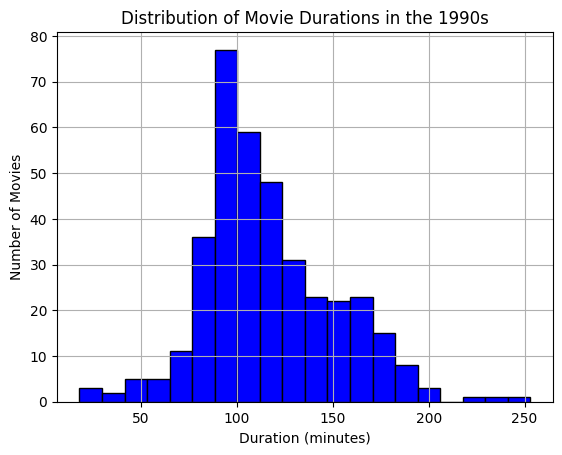

In [9]:
plt.hist(movies_90s['duration_minutes'].dropna(), bins=20, color='blue', edgecolor='black')
plt.title("Distribution of Movie Durations in the 1990s")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()